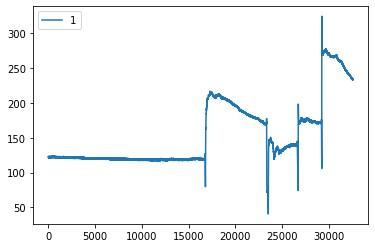

(32589, 2)


In [1]:
from pandas import read_csv
from matplotlib import pyplot
import sys
import numpy as np
import pandas as pd

file="dataORP.18785.txt"


noiseP=-30
noiseN=5

smoothP=-30
smoothN=15

baseP=-30
baseN=5

nowP=-10
nowN=5

threshold=5

series=read_csv(file, sep="\t", header=None,parse_dates=True)
series=series.values
series


series2 = pd.DataFrame(series)
series2.plot()
pyplot.show()

print(series.shape)

In [2]:
list(reversed(range(1,6)))

[5, 4, 3, 2, 1]

['06/07/2021 02:00:00' '06/07/2021 02:00:02' '06/07/2021 02:00:04' ...
 '06/08/2021 01:59:53' '06/08/2021 01:59:56' '06/08/2021 01:59:58']
[1623024000.0 1623024002.0 1623024004.0 ... 1623110393.0 1623110396.0
 1623110398.0]


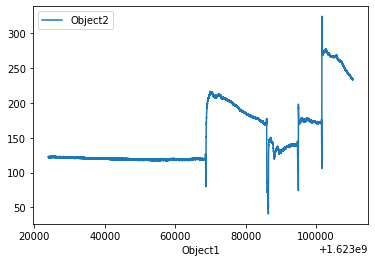

In [3]:
from datetime import datetime

print((series[:,0]))

for i in series:
    i[0]=datetime.strptime(i[0], '%m/%d/%Y %H:%M:%S').timestamp()

print((series[:,0]))

series2 = pd.DataFrame({'Object1':series[:,0],'Object2':series[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

In [4]:
def getSubWindow(v,i,incT):
    t0=v[i][0]
    ret=[]
    if(incT>0):
        for j in range(i+1,len(v)):
            if(v[j][0]<= t0+incT):
                if(v[j][1]>=0):
                    ret.append(v[j][1])
            else:
                 return ret
    else:
        for j in reversed(range(0,i-1)):
            if(v[j][0]>= t0+incT):
                if(v[j][1]>=0):
                    ret.append(v[j][1])
            else:
                 return ret
    return ret       

In [5]:
getSubWindow(series,11,-5)

def avg(lst):
    if(len(lst)==0):
        return -1
    return sum(lst) / len(lst)

print(getSubWindow(series,11,-15))
print(avg(getSubWindow(series,11,-15)))




[122.9, 121.4, 122.7, 122.9, 121.9]
122.35999999999999


In [6]:
def getSubWindowFP(v,i,incTF, incTP):
    return getSubWindow(v,i,incTF)+(getSubWindow(v,i,incTP))

getSubWindowFP(series,11,-5,10)

[122.9, 122.9, 122.8, 122.8, 122.9]

In [7]:
#Quitamos valores puntuales feos 0,-1
for i in range(0,len(series)):
    if(series[i][1]<=0):
        print(getSubWindowFP(series,i,noiseP,noiseN),avg(getSubWindowFP(series,i,noiseP,noiseN)))
        series[i][1]=avg(getSubWindowFP(series,i,noiseP,noiseN))
        

In [8]:
print(series)

[[1623024000.0 122.9]
 [1623024002.0 122.8]
 [1623024004.0 121.5]
 ...
 [1623110393.0 234.3]
 [1623110396.0 233.0]
 [1623110398.0 233.1]]


32589


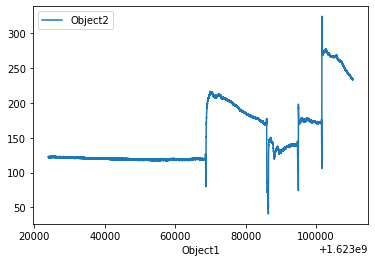

In [9]:
print(len(series))
series2 = pd.DataFrame({'Object1':series[:,0],'Object2':series[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

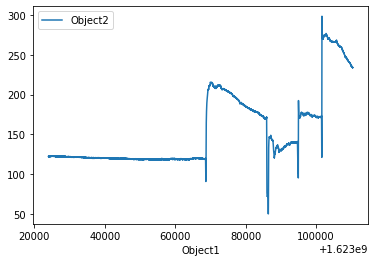

In [10]:
#Quitamos valores puntuales feos 0,-1
avg_series=np.zeros((len(series),2))
for i in range(0,len(series)):
        avg_series[i][1]=avg(getSubWindowFP(series,i,smoothP,smoothN))
        avg_series[i][0]=series[i][0]
series2 = pd.DataFrame({'Object1':avg_series[:,0],'Object2':avg_series[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

2021-06-07 14:23:47
2021-06-07 14:23:49
2021-06-07 14:23:52
2021-06-07 14:23:54
2021-06-07 14:23:57
2021-06-07 14:23:59
2021-06-07 14:24:02
2021-06-07 14:24:04
2021-06-07 14:24:06
2021-06-07 14:24:09
2021-06-07 14:24:12
2021-06-07 14:24:14
2021-06-07 14:24:16
2021-06-07 14:24:19
2021-06-07 14:24:21
2021-06-07 14:24:29
2021-06-07 14:24:31
2021-06-07 14:24:33
2021-06-07 14:24:36
2021-06-07 14:24:38
2021-06-07 14:24:40
2021-06-07 14:24:43
2021-06-07 14:24:45
2021-06-07 14:24:47
2021-06-07 14:24:49
2021-06-07 14:24:52
2021-06-07 14:24:54
2021-06-07 14:24:59
2021-06-07 14:25:01
2021-06-07 14:25:03
2021-06-07 19:12:33
2021-06-07 19:12:38
2021-06-07 19:12:43
2021-06-07 19:12:46
2021-06-07 19:12:48
2021-06-07 19:12:50
2021-06-07 19:12:53
2021-06-07 19:12:58
2021-06-07 19:13:00
2021-06-07 19:13:02
2021-06-07 19:13:05
2021-06-07 19:13:07
2021-06-07 19:13:10
2021-06-07 19:13:13
2021-06-07 19:13:15
2021-06-07 19:13:17
2021-06-07 19:13:19
2021-06-07 19:13:22
2021-06-07 19:13:24
2021-06-07 19:13:29


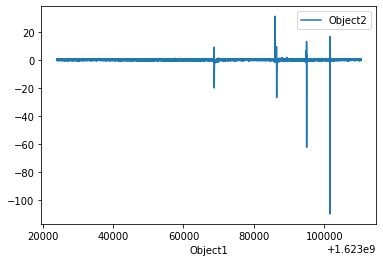

In [13]:
#Computamos subidas
f = open("orp-up.tsv", "a")

avg_up=np.zeros((len(series),2))
for i in range(0,len(series)):
        avg_up[i][1]=avg(getSubWindowFP(series,i,baseP,baseN))-avg(getSubWindowFP(series,i,nowP,nowN))
        avg_up[i][0]=series[i][0]
        f.write(str(datetime.fromtimestamp(avg_up[i][0]))+"\t")
        if(avg_up[i][1]>3):
            print( datetime.fromtimestamp(avg_up[i][0]))
            f.write("1\n")
        else:
            f.write("0\n")
f.close()            
series2 = pd.DataFrame({'Object1':avg_up[:,0],'Object2':avg_up[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

2021-06-07 14:25:14
2021-06-07 14:25:16
2021-06-07 14:25:18
2021-06-07 14:25:20
2021-06-07 14:25:23
2021-06-07 14:25:25
2021-06-07 14:25:30
2021-06-07 14:25:33
2021-06-07 14:25:35
2021-06-07 14:25:37
2021-06-07 14:25:40
2021-06-07 14:25:42
2021-06-07 14:25:45
2021-06-07 14:25:47
2021-06-07 14:25:49
2021-06-07 14:25:52
2021-06-07 14:25:54
2021-06-07 14:25:57
2021-06-07 14:26:00
2021-06-07 14:26:02
2021-06-07 14:26:04
2021-06-07 14:26:07
2021-06-07 14:26:09
2021-06-07 14:26:12
2021-06-07 14:26:17
2021-06-07 14:26:19
2021-06-07 14:26:21
2021-06-07 14:26:24
2021-06-07 19:20:41
2021-06-07 19:20:43
2021-06-07 19:20:46
2021-06-07 19:20:48
2021-06-07 19:20:51
2021-06-07 19:20:57
2021-06-07 19:20:59
2021-06-07 19:21:01
2021-06-07 19:21:03
2021-06-07 19:21:06
2021-06-07 19:21:08
2021-06-07 19:21:11
2021-06-07 19:21:13
2021-06-07 19:21:15
2021-06-07 19:21:18
2021-06-07 19:21:20
2021-06-07 19:21:22
2021-06-07 19:21:28
2021-06-07 19:21:30
2021-06-07 19:21:32
2021-06-07 19:21:35
2021-06-07 19:21:37


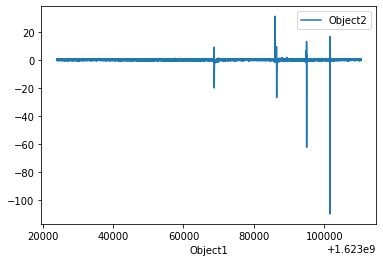

In [18]:
#Computamos subidas
avg_down=np.zeros((len(series),2))
f = open("orp-down.tsv", "w")
for i in range(0,len(series)):
        avg_down[i][1]=avg(getSubWindowFP(series,i,baseP,baseN))-avg(getSubWindowFP(series,i,nowP,nowN))
        avg_down[i][0]=series[i][0]
        f.write(str(datetime.fromtimestamp(avg_up[i][0]))+"\t")
        if(avg_down[i][1]<-5):
            print( datetime.fromtimestamp(avg_down[i][0]))
            f.write("1\n")
        else:
            f.write("0\n")
f.close()               
series2 = pd.DataFrame({'Object1':avg_down[:,0],'Object2':avg_down[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()